1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MaxNLocator
from scipy.stats import norm

The normalization constant is 34.373818870356935


Text(0,0.5,'f(x)')

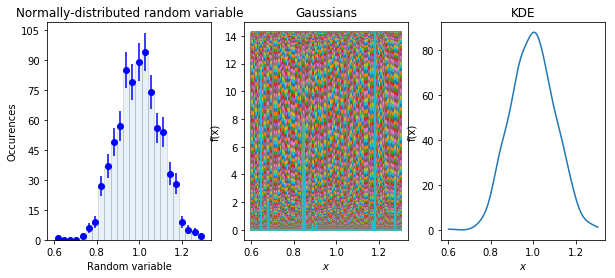

In [2]:
#EXERCISE 1
N=800
mean=1.0
std_dev=0.1

x=np.random.normal(mean,std_dev,N)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))

n,bins,_=ax1.hist(x, bins="auto",histtype='bar', ec='black', alpha=0.1)

bin_avg=(bins[:-1] + bins[1:])/2.
err_n=np.sqrt(n)

ax1.errorbar(bin_avg,n,yerr=err_n, fmt="o",color="blue")
ax1.set_title('Normally-distributed random variable')
ax1.set_xlabel("Random variable")
ax1.set_ylabel('Occurences')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))


gauss_list=[]
points=np.linspace(x.min(), x.max(),N)

#print(x.std(),len(x))

for item in x:
    stddev=1.06*x.std()*x.size**(-0.2)
    gauss=norm.pdf(points,item,stddev)
    gauss_list.append(gauss)
    
ax2.plot(points, gauss_list)
ax2.set_title('Gaussians')
ax2.set_xlabel("$x$")
ax2.set_ylabel('f(x)')

#now find the normalization constant
#area_hist=area_gauss/norm_const
norm_const=np.trapz(np.sum(gauss_list,axis=0),points)/np.trapz(n,x=bin_avg)
print("The normalization constant is", norm_const)

ax3.plot(points, np.sum(gauss_list,axis=0)/norm_const)
#ax3.errorbar(bin_avg,n,yerr=err_n, fmt="o",color="red")
#line above useful to check pattern
ax3.set_title('KDE')
ax3.set_xlabel("$x$")
ax3.set_ylabel('f(x)')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [3]:
"""! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')"""


"! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png\nfrom IPython.display import Image\nImage('two_categories_scatter_plot.png')"

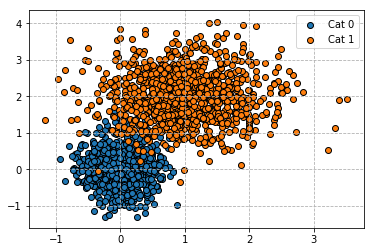

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


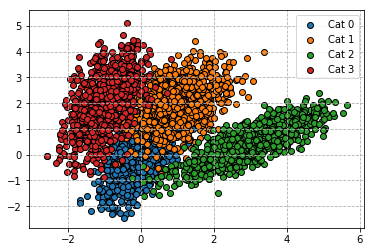

In [4]:
#EXERCISE 2

#To fix ideas
#mean: [[x1,y1],...,[xn,yn]]
#std_dev: [[[x1x1,x1y1], [y1x1,y1y1]], ...]
#N: [N1,...,Nn] number of samples
#n: number of categories
def twodim_gauss(mean,std,N,n):
    gauss_list=[]
    for i in range(n):
        twod_gauss=np.random.multivariate_normal(mean[i,:], std[i,:,:], N[i])
        gauss_list.append(twod_gauss)
        
    return gauss_list

#2 categories
N=[1000,1000]
n=2
mean=np.array([[0,0],[1,2]])
std_dev=np.array([[[0.1,0],[0,0.2]],[[0.5,0],[0,0.5]]]) #we take them uncorrelated: xy=yx=0

gaussian=twodim_gauss(mean,std_dev,N,n)

#print(gaussian)
#print(gaussian[0][:,1])

for i in range(n):
    plt.scatter(x=gaussian[i][:,0], y=gaussian[i][:,1], marker='o', edgecolor='black', label="Cat "+str(i))
    plt.grid(linestyle="--", alpha=1)
    plt.legend(loc="best")
plt.show()    
    
#just to see with 4 categories 
n=4
N=[1000]*n
mean=np.array([[0,0],[1,2],[3,0.5],[-1,2]])
std_dev=np.array([np.random.rand(2,2),np.random.rand(2,2),np.random.rand(2,2),np.random.rand(2,2)])

gaussian2=twodim_gauss(mean,std_dev,N,n)

for i in range(n):
    plt.scatter(x=gaussian2[i][:,0], y=gaussian2[i][:,1], marker='o',edgecolor='black', label="Cat "+str(i))
    plt.grid(linestyle="--", alpha=1)
    plt.legend(loc="best")

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

          residuals     distances
count  10489.000000  10489.000000
mean      -0.121878      9.954824
std        0.439143      5.847142
min       -2.000000      0.000000
25%       -0.280000      4.700000
50%       -0.100000     10.000000
75%        0.070000     15.100000
max        1.992857     24.900000

 LINEAR REGRESSION WITH SCIPY
slope = 0.0032597701220305835
intercept = -0.15432816763069473
r_value = 0.043403510522559086
pvalue = 8.717037183576464e-06
std_err = 0.0007327014008445789




LINEAR REGRESSION WITH SEABORN


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<ErrorbarContainer object of 3 artists>

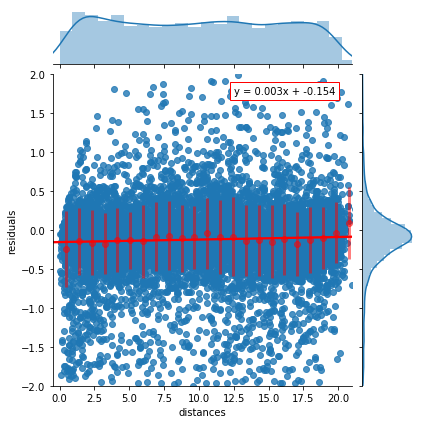

In [6]:
#EXERCISE 3
from scipy.stats import linregress

file=np.load("./residuals_261.npy").item()
dataset = pd.DataFrame(file)

# Clean the dataset
dataset = dataset[abs(dataset["residuals"]) < 2]
print(dataset.describe())

# linear regression with scipy
slope, intercept, r_value, p_value, std_err = linregress(x=dataset["distances"], y=dataset["residuals"])
print("\n LINEAR REGRESSION WITH SCIPY")
print("slope =", slope)
print("intercept =", intercept)
print("r_value =", r_value)
print("pvalue =", p_value)
print("std_err =", std_err)
print("\n")

#linear regression with seaborn
print("\n")
print("LINEAR REGRESSION WITH SEABORN")
plot=sns.jointplot(x="distances", y="residuals", data=dataset, kind="reg", xlim=[-0.5, 21], ylim=[-2,2], 
                   joint_kws={'line_kws':{'color':'red'}})
plt.text(x=12.5, y=1.75, s="y = {0:.3f}x + {1:.3f}".format(slope, intercept), bbox=dict(ec='red',fc="white"))

#filling the np arrays
n, bins = np.histogram(dataset["distances"], bins="auto")
x = []
for i in range (len(n)):
    x.append(0.5*(bins[i+1]+bins[i])) #center is the average of the two extremes
    
# add a column indicating the bin number
dataset["bin"] = ""

for i in range(len(x)):
    mask = (bins[i] < dataset["distances"]) & (dataset["distances"] < bins[i+1])
    dataset.loc[mask, "bin"] = i

y = dataset.groupby("bin").mean()["residuals"].values
err_y = dataset.groupby("bin").std()["residuals"].values
    
plt.errorbar(x,y,yerr=err_y, label='Profile plot with error bars',linewidth=3,fmt='ro', alpha=0.5)

The results with *scipy* are in fact the same as the ones with *seaborn*.